In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



The main aim of this notebook is to train RNN - GRU models for 250 dimension dataset without the use of theme part.


In [2]:
musicFeatures = pd.read_pickle("./musicFeatures.pkl")  

In [3]:
musicFeatures.shape

(26900, 22)

In [4]:
musicFeatures.head(3)

,id,genre,mfccFeature_0,mfccFeature_1,mfccFeature_2,mfccFeature_3,mfccFeature_4,mfccFeature_5,mfccFeature_6,mfccFeature_7,...,mfccFeature_10,mfccFeature_11,mfccFeature_12,mfccFeature_13,mfccFeature_14,themeFeature_0,themeFeature_1,themeFeature_2,themeFeature_3,themeFeature_4
0,124425_0,Folk,"[-367.4169, -240.58614, -193.78488, -180.29262...","[163.79123, 170.1294, 171.51189, 161.30435, 14...","[6.0959854, -5.9718704, -3.6486344, -1.2554941...","[53.194122, 63.06723, 60.13885, 54.763412, 52....","[16.68528, 19.538809, 19.626118, 18.60508, 23....","[-23.51472, -19.84507, -16.962742, -13.548637,...","[6.3363132, -1.276854, -5.610017, -4.050003, -...","[-20.14743, -24.12778, -16.919537, -7.6289234,...",...,"[3.951639, -4.166794, -8.241913, -9.794014, -1...","[5.920375, 9.249519, 8.353765, 11.909894, 14.4...","[-12.381685, -16.062777, -16.373697, -15.77498...","[-3.8526406, -3.5650363, -4.6753526, -5.407305...","[-4.4005404, -11.534243, -12.7789135, -14.0914...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
1,124425_1,Folk,"[-176.67264, -169.07156, -142.83098, -116.0994...","[125.95861, 142.0693, 138.62712, 128.68915, 12...","[-42.819057, -54.282654, -64.97652, -73.68849,...","[68.79902, 82.17572, 71.34984, 73.27362, 84.63...","[15.051884, 15.13154, 15.273981, 14.384039, 15...","[-5.963161, -10.348415, -12.421081, -9.166971,...","[18.740742, 19.350863, 8.707056, 3.6187146, 1....","[-11.269847, -7.254199, 1.2921772, -1.4600475,...",...,"[-5.3846745, -10.779312, -19.985872, -18.81395...","[12.694374, 11.362453, 8.072839, 4.8536325, -0...","[3.3793998, -0.6741159, -0.14108896, -5.083455...","[-19.578459, -20.371014, -11.236882, -7.421087...","[-8.606797, -10.857103, -13.955954, -13.888264...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."
2,124425_2,Folk,"[-112.90256, -84.587326, -92.53052, -99.84867,...","[118.598724, 102.67175, 82.80994, 73.35031, 71...","[-33.237568, -38.343197, -34.45424, -24.077305...","[50.234768, 52.99376, 56.314552, 51.52988, 53....","[18.136402, 22.863585, 18.818027, 11.438265, 8...","[-23.589928, -19.38637, -15.253525, -5.8537474...","[11.365215, 6.558339, -1.7250502, -4.8964157, ...","[-8.613762, -10.419959, -4.151663, -1.5471857,...",...,"[-19.939487, -16.535833, -21.92295, -25.605438...","[12.999569, 8.9071, 3.3847241, 5.747637, 2.470...","[-5.4092526, -7.6361217, -13.698164, -13.45112...","[-0.42731082, -2.8598223, -1.4495995, 1.697975...","[-14.1753845, -20.045826, -20.387835, -21.9254...","[-2.81877732, 0.0170741491, -2.23746324, -1.79...","[-0.648167074, -0.260594785, -1.02404821, 2.81...","[-0.6686466, 2.7766242, -1.6993774, -3.4631765...","[-0.7302982, 1.5127099, 1.2979797, 0.65926456,...","[-2.26469612, 3.18752861, -1.83492291, 1.09744..."


In [5]:
"""
Verifying all shapres and types of data
"""
print(musicFeatures.shape)
print('MFCC Features \n')
print(type(musicFeatures['mfccFeature_0'].iloc[0]))
print(len(musicFeatures['mfccFeature_0'].iloc[0]))
print(type(musicFeatures['mfccFeature_0'].iloc[0][0]))

print('Theme Features \n')
print(type(musicFeatures['themeFeature_0'].iloc[0]))
print(musicFeatures['themeFeature_0'].iloc[0].size)
print(type(musicFeatures['themeFeature_0'].iloc[0][0]))



(26900, 22)
MFCC Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>
Theme Features 

<class 'numpy.ndarray'>
250
<class 'numpy.float64'>


We split the dataset into x and y, y having the predicting columns, we also drop the theme features as it is not needed

In [6]:
#Spliting x and y

y = musicFeatures['genre']
x = musicFeatures.loc[:, musicFeatures.columns != 'genre']
x = x.drop(['id','themeFeature_0','themeFeature_1','themeFeature_2','themeFeature_3','themeFeature_4'],axis =1)

print(x.shape)
print(y.shape)

(26900, 15)
(26900,)


Since we have an np array as in each cell, we need to reshape the data into a 3rd array for the network, we use the following function for the same.

In [7]:
def convertTo3DnpArray(df):
    new = []

    for index, row in df.iterrows():
        temp = []
        for i in row:
            temp.append(i)
        temp = np.stack(temp, axis=1)
        new.append(temp)
    new = np.stack(new, axis=0)
    
    return new

We split the dataset into train,test and valid which is of the ratio 80:10:10. Each model is trained on train and tested on test, once the best model is identified, we do a final validation on valid dataset.

In [8]:
#Train test valid split

x_train_temp, x_valid, y_train_temp, y_valid = train_test_split(x,y,test_size=0.1,random_state=12,stratify=y)
x_train, x_test, y_train, y_test = train_test_split(x_train_temp,y_train_temp,test_size=0.1/0.9,random_state=12,stratify=y_train_temp)

print('Final Sizes of all datasets')
print('x_train :',x_train.shape)
print('x_test :',x_test.shape)
print('x_valid :',x_valid.shape)
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)
print(' \n')

print('Value counts ')
print('y_train :')
print(y_train.value_counts())
print('y_test :')
print(y_test.value_counts())
print('y_valid :')
print(y_valid.value_counts())



Final Sizes of all datasets
x_train : (21520, 15)
x_test : (2690, 15)
x_valid : (2690, 15)
y_train : (21520,)
y_test : (2690,)
y_valid : (2690,)
 

Value counts 
y_train :
Rock            3820
Hip-Hop         3304
Experimental    3228
Folk            3224
Electronic      3192
Pop             2428
Instrumental    2324
Name: genre, dtype: int64
y_test :
Rock            477
Hip-Hop         413
Experimental    404
Folk            403
Electronic      399
Pop             303
Instrumental    291
Name: genre, dtype: int64
y_valid :
Rock            478
Hip-Hop         413
Folk            403
Experimental    403
Electronic      399
Pop             304
Instrumental    290
Name: genre, dtype: int64


In [10]:
#splitting dataset into two parts

x_train_audio = convertTo3DnpArray(x_train.iloc[:,0:15])
x_test_audio = convertTo3DnpArray(x_test.iloc[:,0:15])
x_valid_audio = convertTo3DnpArray(x_valid.iloc[:,0:15])

print(x_train_audio.shape)

(21520, 250, 15)


In [11]:
x_train.iloc[:,0:15]

,mfccFeature_0,mfccFeature_1,mfccFeature_2,mfccFeature_3,mfccFeature_4,mfccFeature_5,mfccFeature_6,mfccFeature_7,mfccFeature_8,mfccFeature_9,mfccFeature_10,mfccFeature_11,mfccFeature_12,mfccFeature_13,mfccFeature_14
35394,"[-259.05927, -239.89516, -210.36134, -191.0854...","[95.85247, 89.139465, 100.31354, 114.44683, 12...","[-37.76436, -62.810684, -82.836006, -89.18021,...","[35.43055, 31.09402, 16.134083, 23.663452, 24....","[-3.8478534, -3.804813, -18.247433, -21.18354,...","[-5.8638554, -8.563865, -5.0026045, -3.563768,...","[-29.522072, -30.139166, -25.777792, -18.43643...","[-15.362446, -16.980038, -18.577564, -19.80409...","[-17.15803, -18.717222, -12.115081, -13.080694...","[4.9135947, 0.48395002, -2.3608677, -8.914128,...","[-6.845843, -8.657402, -8.819773, -13.005529, ...","[-7.297282, -4.4590926, -4.291797, -10.961505,...","[-8.618434, -8.838449, -20.322239, -25.85178, ...","[8.280407, 6.65845, -3.0541248, -7.157876, -7....","[8.006058, 4.326626, -4.908849, -5.9096045, -3..."
34049,"[-188.014, -206.20021, -225.0521, -220.18987, ...","[128.69154, 141.3887, 154.6398, 159.06891, 149...","[-13.482424, -30.97063, -57.24858, -63.42682, ...","[23.985256, 33.63526, 42.476974, 35.33845, 25....","[14.964792, 19.501078, 24.636375, 23.640629, 1...","[-17.882114, -18.361004, -14.050748, -11.75215...","[-20.248413, -13.562236, -8.63477, -8.473328, ...","[-14.179203, -10.178944, -10.123768, -12.31093...","[-5.8441324, -6.1650333, -3.1949024, -2.722711...","[10.911045, 8.321631, 6.160431, 0.95847726, 6....","[7.8805685, 4.39023, 5.0924635, -2.262684, -5....","[-2.038714, 0.29762447, 0.21831286, -1.5235238...","[-6.681349, -7.536511, -8.555668, -5.4461303, ...","[-9.045403, -11.071377, -10.651661, -8.457749,...","[-3.9182348, -0.5984701, -4.849672, -3.298818,..."
34247,"[-82.13368, -56.982624, -58.14949, -60.955105,...","[74.79721, 72.48038, 69.69021, 71.89056, 76.14...","[-9.761583, -8.974573, -13.565889, -18.574867,...","[44.51985, 46.574883, 50.270557, 49.844574, 45...","[-1.7989714, -5.9998593, -8.879391, -7.259489,...","[23.213932, 23.701248, 27.05341, 30.459, 28.99...","[8.85959, 6.395796, 3.8830438, 4.5139427, 5.85...","[10.348799, 16.238556, 20.261578, 19.654716, 2...","[13.655914, 8.072505, -0.37761527, 0.3474199, ...","[16.148502, 13.345703, 6.496121, 6.0975375, 11...","[-3.413521, -0.6451754, -8.567261, -14.476906,...","[-2.6246097, -2.939661, -0.95807236, -2.185254...","[-7.3780622, -13.883275, -14.423538, -12.80759...","[3.8376787, 6.9531918, 11.388884, 15.410437, 1...","[-2.1842833, -4.0735054, -3.4050357, -2.386907..."
35132,"[-74.62353, -47.188427, -43.740658, -31.355085...","[110.29732, 108.80856, 104.4259, 102.99172, 10...","[19.360918, 18.530136, 10.443481, -7.501622, -...","[32.394424, 31.694412, 30.137642, 27.804893, 2...","[-8.631376, -3.527607, 3.8489022, 4.4208837, -...","[5.9561634, 13.809061, 19.815063, 12.495829, 6...","[-8.04807, -11.654659, -10.895243, -18.075535,...","[9.950865, 10.536844, 17.713945, 17.78846, 17....","[9.039571, 1.4659774, -7.285754, -0.81587684, ...","[8.814006, 9.20682, 5.9413443, 8.706055, 9.271...","[-11.550571, -8.380802, -5.6130843, -1.6310983...","[4.697386, 7.635721, 12.914742, 15.211265, 10....","[-11.157985, -15.638721, -8.871193, -7.4123173...","[2.4558992, 2.0242095, 7.875683, 6.6735973, 0....","[-5.083339, -7.525996, -2.9894814, -2.4445453,..."
22687,"[-10.387641, -2.7015615, -25.830664, -42.18832...","[105.466125, 105.41113, 110.17697, 114.190765,...","[4.6587563, 3.691368, 2.1789696, 3.4156444, 2....","[23.292372, 30.258991, 41.930916, 45.1681, 44....","[3.5131118, 4.38157, 6.6126113, 12.240705, 11....","[6.5239367, 8.461456, 10.868671, 12.047181, 6....","[-17.583548, -17.156866, -19.27493, -18.639069...","[-1.9000115, 4.3362274, 5.219447, 5.1462927, 7...","[-8.118086, -10.51737, -15.752861, -18.01086, ...","[2.6302576, 0.49581635, 0.15905619, -1.2537093...","[-0.6385004, -1.2256694, -3.262991, -3.5495977...","[-3.275594, 3.6539168, 9.7260685, 10.16334, 11...","[-10.0126

In [12]:
ohe = OneHotEncoder()

y_valid = ohe.fit_transform(y_valid.values.reshape(-1, 1)).toarray()
y_train = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()
y_test  = ohe.fit_transform(y_test .values.reshape(-1, 1)).toarray()

print('Verifying size')
print('y_train :',y_train.shape)
print('y_test :',y_test.shape)
print('y_valid :',y_valid.shape)


Verifying size
y_train : (21520, 7)
y_test : (2690, 7)
y_valid : (2690, 7)


In [13]:
from keras.models import Sequential,load_model
from keras.layers import Dense,GRU,Flatten,concatenate,Dropout,LSTM
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Bidirectional
import matplotlib.pyplot as plt
plt.style.use('ggplot')

The following function is used to plot the graphs for train and loss accuracy.

In [14]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Test acc')
    plt.title('Training and test accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Test loss')
    plt.title('Training and test loss')
    plt.legend()

We first try Small RNN GRU layer

In [16]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')

#Audio layer
audio_GRU1 = GRU(64,return_sequences=True)(audio_in)
audio_GRU2 = GRU(64)(audio_GRU1)
audio_dense = Dense(64, activation='relu')(audio_GRU2)

dense2 = Dense(32, activation='relu')(audio_dense)
dense3 = Dense(16, activation='relu')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model = Model(inputs=[audio_in], outputs=[op])

model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 audio_in (InputLayer)       [(None, 250, 15)]         0         
                                                                 
 gru_2 (GRU)                 (None, 250, 64)           15552     
                                                                 
 gru_3 (GRU)                 (None, 64)                24960     
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 op (Dense)                  (None, 7)                 119   

Epoch 1/50
673/673 [==============================] - 63s 91ms/step - loss: 1.5765 - accuracy: 0.3941 - val_loss: 1.4432 - val_accuracy: 0.4717
Epoch 2/50
673/673 [==============================] - 60s 90ms/step - loss: 1.3871 - accuracy: 0.4878 - val_loss: 1.3581 - val_accuracy: 0.5007
Epoch 3/50
673/673 [==============================] - 63s 93ms/step - loss: 1.3190 - accuracy: 0.5123 - val_loss: 1.3086 - val_accuracy: 0.5167
Epoch 4/50
673/673 [==============================] - 63s 93ms/step - loss: 1.2756 - accuracy: 0.5317 - val_loss: 1.3107 - val_accuracy: 0.5160
Epoch 5/50
673/673 [==============================] - 63s 93ms/step - loss: 1.2364 - accuracy: 0.5471 - val_loss: 1.2715 - val_accuracy: 0.5338
Epoch 6/50
673/673 [==============================] - 62s 93ms/step - loss: 1.2027 - accuracy: 0.5638 - val_loss: 1.2551 - val_accuracy: 0.5487
Epoch 7/50
673/673 [==============================] - 64s 95ms/step - loss: 1.1690 - accuracy: 0.5760 - val_loss: 1.2280 - val_accuracy:

INFO:tensorflow:Assets written to: simple_rnn_GRU_model_notheme\assets


INFO:tensorflow:Assets written to: simple_rnn_GRU_model_notheme\assets


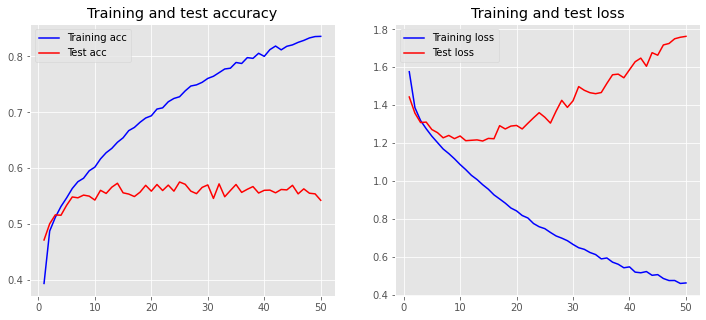

In [17]:
#Simple model , no improvement over LSTM

model.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h=model.fit({'audio_in': x_train_audio},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio},{'op': y_test}))


model.save('simple_rnn_GRU_model_notheme')


plot_history(h)

We had some regularization to the previous model architecture

In [18]:
#Input layers
audio_in = Input(shape=(x_train_audio.shape[1], x_train_audio.shape[2]), name='audio_in')



#Audio layer
audio_GRU1 = GRU(64,return_sequences=True,dropout=0.1)(audio_in)
audio_GRU2 = GRU(64,recurrent_dropout=0.05)(audio_GRU1)
audio_dense = Dense(64, activation='relu')(audio_GRU2)

drop1 = Dropout(0.1)(audio_dense)
dense2 = Dense(32, activation='relu')(drop1)
dense3 = Dense(16, activation='relu')(dense2)
op = Dense(7, activation='softmax',name='op')(dense3)


model2 = Model(inputs=[audio_in], outputs=[op])

model2.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 audio_in (InputLayer)       [(None, 250, 15)]         0         
                                                                 
 gru_4 (GRU)                 (None, 250, 64)           15552     
                                                                 
 gru_5 (GRU)                 (None, 64)                24960     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 16)                528 

Epoch 1/50
673/673 [==============================] - 79s 115ms/step - loss: 1.6511 - accuracy: 0.3592 - val_loss: 1.6556 - val_accuracy: 0.3498
Epoch 2/50
673/673 [==============================] - 78s 115ms/step - loss: 1.4739 - accuracy: 0.4499 - val_loss: 1.5608 - val_accuracy: 0.3978
Epoch 3/50
673/673 [==============================] - 78s 116ms/step - loss: 1.4078 - accuracy: 0.4803 - val_loss: 1.5403 - val_accuracy: 0.4149
Epoch 4/50
673/673 [==============================] - 79s 117ms/step - loss: 1.3636 - accuracy: 0.4988 - val_loss: 1.5238 - val_accuracy: 0.4331
Epoch 5/50
673/673 [==============================] - 79s 117ms/step - loss: 1.3279 - accuracy: 0.5144 - val_loss: 1.4353 - val_accuracy: 0.4662
Epoch 6/50
673/673 [==============================] - 79s 117ms/step - loss: 1.3018 - accuracy: 0.5204 - val_loss: 1.3628 - val_accuracy: 0.4918
Epoch 7/50
673/673 [==============================] - 79s 118ms/step - loss: 1.2700 - accuracy: 0.5353 - val_loss: 1.3419 - val_ac

INFO:tensorflow:Assets written to: simple_rnn_GRU_model_dropout_notheme\assets


INFO:tensorflow:Assets written to: simple_rnn_GRU_model_dropout_notheme\assets


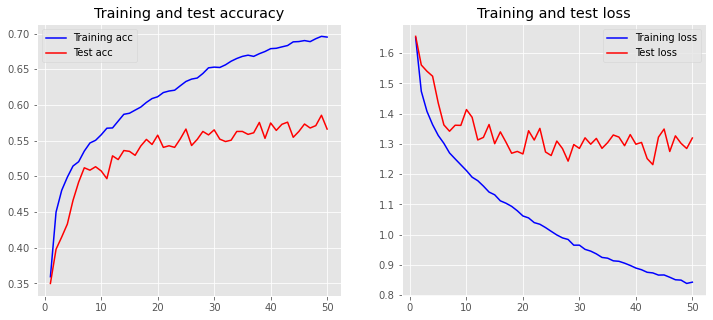

In [19]:

model2.compile(optimizer = 'adam',
                     loss='categorical_crossentropy',
                     metrics = ['accuracy']
                     )


h=model2.fit({'audio_in': x_train_audio},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio},{'op': y_test}))


model2.save('simple_rnn_GRU_model_dropout_notheme')


plot_history(h)

Epoch 1/50
673/673 [==============================] - 87s 129ms/step - loss: 0.8308 - accuracy: 0.6994 - val_loss: 1.3559 - val_accuracy: 0.5636
Epoch 2/50
673/673 [==============================] - 88s 131ms/step - loss: 0.8206 - accuracy: 0.7049 - val_loss: 1.3519 - val_accuracy: 0.5677
Epoch 3/50
673/673 [==============================] - 86s 127ms/step - loss: 0.8213 - accuracy: 0.7011 - val_loss: 1.3167 - val_accuracy: 0.5699
Epoch 4/50
673/673 [==============================] - 86s 127ms/step - loss: 0.8179 - accuracy: 0.7035 - val_loss: 1.2956 - val_accuracy: 0.5736
Epoch 5/50
673/673 [==============================] - 85s 127ms/step - loss: 0.8103 - accuracy: 0.7072 - val_loss: 1.3471 - val_accuracy: 0.5695
Epoch 6/50
673/673 [==============================] - 85s 127ms/step - loss: 0.8060 - accuracy: 0.7070 - val_loss: 1.3048 - val_accuracy: 0.5888
Epoch 7/50
673/673 [==============================] - 86s 127ms/step - loss: 0.7959 - accuracy: 0.7125 - val_loss: 1.3076 - val_ac

INFO:tensorflow:Assets written to: simple_rnn_GRU_model_dropout__notheme_cont\assets


INFO:tensorflow:Assets written to: simple_rnn_GRU_model_dropout__notheme_cont\assets


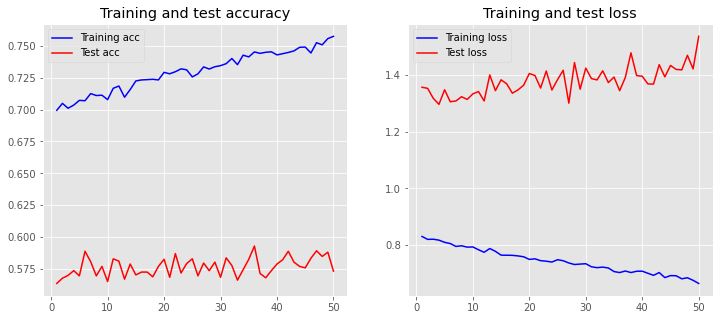

In [21]:

h2=model2.fit({'audio_in': x_train_audio},{'op': y_train},
              epochs=50, batch_size=32,
            validation_data=({'audio_in': x_test_audio},{'op': y_test}))


model2.save('simple_rnn_GRU_model_dropout__notheme_cont')


plot_history(h2)

Final Evaluation - THe best model is first.

In [23]:
model.evaluate(x_valid_audio,y_valid)

85/85 [==============================] - 4s 25ms/step - loss: 1.8210 - accuracy: 0.5636


[1.8209993839263916, 0.5635687708854675]